In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')
train_dir = os.path.join(DATA_DIR, 'Training_set/Training_set')
test_dir = os.path.join(DATA_DIR, 'test/test')
CATEGORIES = os.listdir(train_dir)
print(train_dir)
print(CATEGORIES)

/home/asifhaiderddad/Dev/ImageClassification/data/Training_set/Training_set
['electric car', 'electric bus']


#### Testing Images

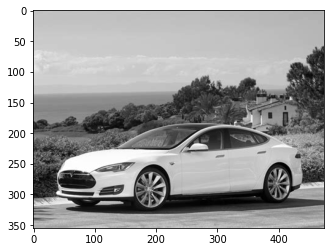

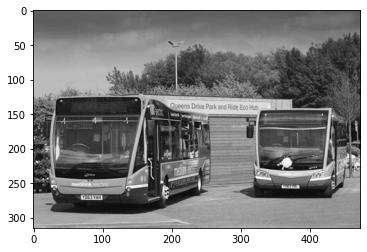

[array([[204, 201, 198, ..., 180, 186, 186],
       [203, 200, 197, ..., 179, 185, 185],
       [201, 199, 196, ..., 178, 183, 183],
       ...,
       [176, 181, 174, ..., 144, 147, 147],
       [176, 181, 174, ..., 172, 178, 178],
       [176, 181, 174, ..., 173, 180, 180]], dtype=uint8), array([[107, 107, 106, ...,  88,  91,  91],
       [106, 105, 104, ...,  87,  91,  91],
       [103, 102, 102, ...,  86,  90,  90],
       ...,
       [163, 168, 161, ..., 137, 137, 141],
       [179, 184, 177, ..., 140, 149, 154],
       [178, 185, 178, ..., 143, 149, 153]], dtype=uint8)]


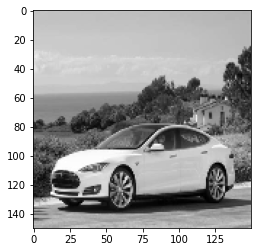

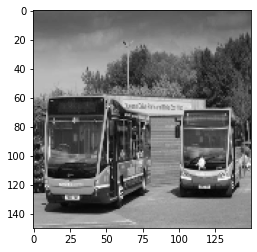

[array([[204, 201, 198, ..., 180, 186, 186],
       [203, 200, 197, ..., 179, 185, 185],
       [201, 199, 196, ..., 178, 183, 183],
       ...,
       [176, 181, 174, ..., 144, 147, 147],
       [176, 181, 174, ..., 172, 178, 178],
       [176, 181, 174, ..., 173, 180, 180]], dtype=uint8), array([[107, 107, 106, ...,  88,  91,  91],
       [106, 105, 104, ...,  87,  91,  91],
       [103, 102, 102, ...,  86,  90,  90],
       ...,
       [163, 168, 161, ..., 137, 137, 141],
       [179, 184, 177, ..., 140, 149, 154],
       [178, 185, 178, ..., 143, 149, 153]], dtype=uint8)]


In [16]:
# Displaying Image in their original sizes
img_arrays = []
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):  # iterate over each image per category
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')
        plt.show()  # display!

        break  # we just want one for now so break
    img_arrays.append(img_array)
print(img_arrays)

# Resizing Images
SIZE = 150
new_arrays = []
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):  # iterate over each image per category
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (SIZE, SIZE)) # Resizing to 150 x 150
        plt.imshow(new_array, cmap='gray')
        plt.show()

        break  # we just want one for now so break
    new_arrays.append(new_array)
print(img_arrays)



#### Preprocessing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rescale = 1/255)
test_data_generator = ImageDataGenerator(rescale = 1/255)

2021-09-19 22:03:22.755743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-19 22:03:22.755770: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Preparing Training and Testing Data 

In [8]:
train_set = train_data_generator.flow_from_directory(train_dir, target_size = (150, 150), batch_size=16, class_mode='binary')
test_set = test_data_generator.flow_from_directory(test_dir, target_size = (150, 150), batch_size=16, class_mode='binary')

Found 1486 images belonging to 2 classes.
Found 382 images belonging to 2 classes.


#### Model Object Creation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import Flatten, Dense


model = Sequential()


model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 16)        4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4624)             

#### Training Model

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit_generator(train_set, epochs = 20, validation_data=test_set)

Epoch 1/20


2021-09-19 22:06:45.665721: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 89718784 exceeds 10% of free system memory.


 1/93 [..............................] - ETA: 1:45 - loss: 0.6951 - accuracy: 0.3750

2021-09-19 22:06:46.070245: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 89718784 exceeds 10% of free system memory.
2021-09-19 22:06:46.255172: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 89718784 exceeds 10% of free system memory.
2021-09-19 22:06:46.606585: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 89718784 exceeds 10% of free system memory.


93/93 [==============================] - 55s 583ms/step - loss: 0.6069 - accuracy: 0.6615 - val_loss: 0.4980 - val_accuracy: 0.7670
Epoch 2/20
93/93 [==============================] - 59s 630ms/step - loss: 0.4244 - accuracy: 0.8116 - val_loss: 0.4498 - val_accuracy: 0.7984
Epoch 3/20
93/93 [==============================] - 69s 742ms/step - loss: 0.3332 - accuracy: 0.8641 - val_loss: 0.4792 - val_accuracy: 0.7827
Epoch 4/20
93/93 [==============================] - 75s 810ms/step - loss: 0.2788 - accuracy: 0.8795 - val_loss: 0.4777 - val_accuracy: 0.8010
Epoch 5/20
93/93 [==============================] - 77s 823ms/step - loss: 0.1960 - accuracy: 0.9287 - val_loss: 0.4447 - val_accuracy: 0.8508
Epoch 6/20
93/93 [==============================] - 79s 851ms/step - loss: 0.1045 - accuracy: 0.9603 - val_loss: 0.5174 - val_accuracy: 0.8508
Epoch 7/20
93/93 [==============================] - 78s 839ms/step - loss: 0.0653 - accuracy: 0.9764 - val_loss: 0.5038 - val_accuracy: 0.8691
Epoch 8/20

#### Model Evaluation

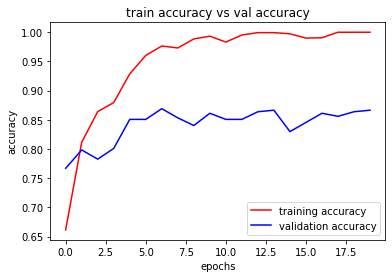

In [15]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'r', label = 'training accuracy')
plt.plot(accuracy_val, 'b', label = 'validation accuracy')
plt.title('train accuracy vs val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

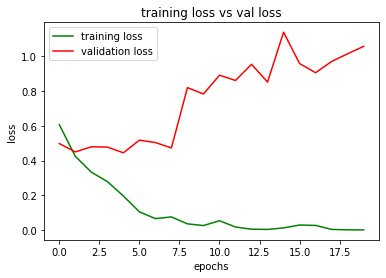

In [16]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label = 'training loss')
plt.plot(loss_val, 'r', label = 'validation loss')
plt.title('training loss vs val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(test_set)

24/24 [==============================] - 4s 158ms/step - loss: 1.0584 - accuracy: 0.8665


[1.0583586692810059, 0.8664921522140503]

## VGG-16

#### Pre-processing

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rescale = 1./255,horizontal_flip = True)

train_data_2 = data_gen.flow_from_directory(directory=train_dir, batch_size = 16,target_size=(150,150),class_mode = 'binary')
test_data_2 = data_gen.flow_from_directory(directory=test_dir, batch_size = 16,target_size=(150,150),class_mode = 'binary')

Found 1486 images belonging to 2 classes.
Found 382 images belonging to 2 classes.


#### Preparing Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import Flatten, Dense


model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(2, 2), input_shape=(150, 150, 3), padding = "same", strides=(2,2),activation ='relu'))
model2.add(Conv2D(filters=64, kernel_size=(4, 4), strides=(2,2), padding = "same", activation ='relu'))
model2.add(Conv2D(filters=64, kernel_size=(2, 2), strides=(2,2), activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(filters=128, kernel_size=(4, 4),  strides=(2,2), padding = "same", activation ='relu'))
model2.add(Conv2D(filters=128, kernel_size=(2, 2),  strides=(2,2), activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))


model2.add(Flatten())
model2.add(Dense(units = 256, activation = 'relu'))
model2.add(Dense(units=1, activation = 'sigmoid'))

model2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 32)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 64)        32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        16448     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         131200    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         65664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 128)         0

2021-09-20 03:02:14.686055: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-20 03:02:14.686086: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-20 03:02:14.686106: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (asifhaiderddad-desktop): /proc/driver/nvidia/version does not exist


#### Training Model

In [11]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit_generator(train_data_2, steps_per_epoch=50, epochs=20,validation_data=test_data_2)

Epoch 1/20
50/50 [==============================] - 11s 203ms/step - loss: 0.2397 - accuracy: 0.8997 - val_loss: 0.3500 - val_accuracy: 0.8482
Epoch 2/20
50/50 [==============================] - 10s 190ms/step - loss: 0.2022 - accuracy: 0.9200 - val_loss: 0.3048 - val_accuracy: 0.8639
Epoch 3/20
50/50 [==============================] - 11s 215ms/step - loss: 0.1589 - accuracy: 0.9386 - val_loss: 0.3453 - val_accuracy: 0.8691
Epoch 4/20
50/50 [==============================] - 10s 191ms/step - loss: 0.1821 - accuracy: 0.9250 - val_loss: 0.2959 - val_accuracy: 0.8927
Epoch 5/20
50/50 [==============================] - 10s 196ms/step - loss: 0.1451 - accuracy: 0.9538 - val_loss: 0.2737 - val_accuracy: 0.8979
Epoch 6/20
50/50 [==============================] - 11s 216ms/step - loss: 0.1573 - accuracy: 0.9413 - val_loss: 0.3489 - val_accuracy: 0.8691
Epoch 7/20
50/50 [==============================] - 16s 311ms/step - loss: 0.1029 - accuracy: 0.9612 - val_loss: 0.2921 - val_accuracy: 0.8927

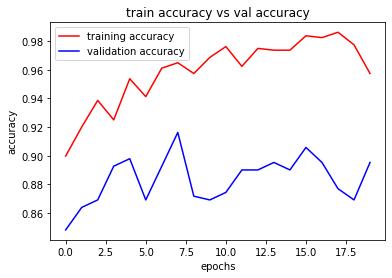

In [12]:
accuracy_train = history2.history['accuracy']
accuracy_val = history2.history['val_accuracy']
plt.plot(accuracy_train, 'r', label = 'training accuracy')
plt.plot(accuracy_val, 'b', label = 'validation accuracy')
plt.title('train accuracy vs val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

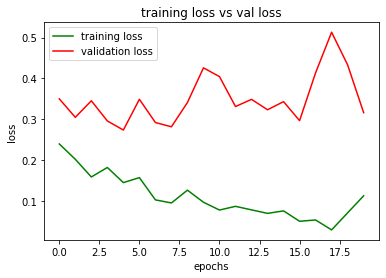

In [13]:
loss_train = history2.history['loss']
loss_val = history2.history['val_loss']
plt.plot(loss_train, 'g', label = 'training loss')
plt.plot(loss_val, 'r', label = 'validation loss')
plt.title('training loss vs val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
model2.evaluate(test_data_2)

24/24 [==============================] - 1s 58ms/step - loss: 0.3054 - accuracy: 0.9058


[0.3053531348705292, 0.9057591557502747]